# Houseprice Prediction (Regression)



In [2]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/Users/sumitjajoo/Desktop/APPLIED MACHINE LEARNING/Project1_group19/houseprice.csv')

In [4]:
hp=pd.DataFrame(df)

In [5]:
hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,NaN,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,NaN,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,NaN,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,NaN,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
hp=hp.drop(columns=['Id'])

In [7]:
hp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,NaN,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,NaN,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,NaN,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,NaN,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Percentage of missing values in each column

In [8]:
total = hp.isnull().sum().sort_values(ascending=False)
percent = (hp.isnull().sum()/hp.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
Fireplaces,881,0.603425
FireplaceQu,690,0.472603
LotShape,363,0.248630
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479


Directly dropped all those variables who were having more than 20% of null values!!

In [9]:
hp=hp.drop(columns=['PoolQC','MiscFeature','Alley','Fence','Fireplaces','FireplaceQu','LotShape'])

### Imputing null values

In [10]:
hp["MasVnrType"] = hp["MasVnrType"].fillna("None")
hp["MasVnrArea"] = hp["MasVnrArea"].fillna(0)

In [11]:
hp["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [12]:
hp["LotFrontage"] = hp["LotFrontage"].fillna(hp['LotFrontage'].median())

In [13]:
hp['Electrical'] = hp['Electrical'].fillna(hp['Electrical'].mode()[0])

In [14]:
hp.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 73, dtype: int64

CORRELATION BETWEEN VARIABLES

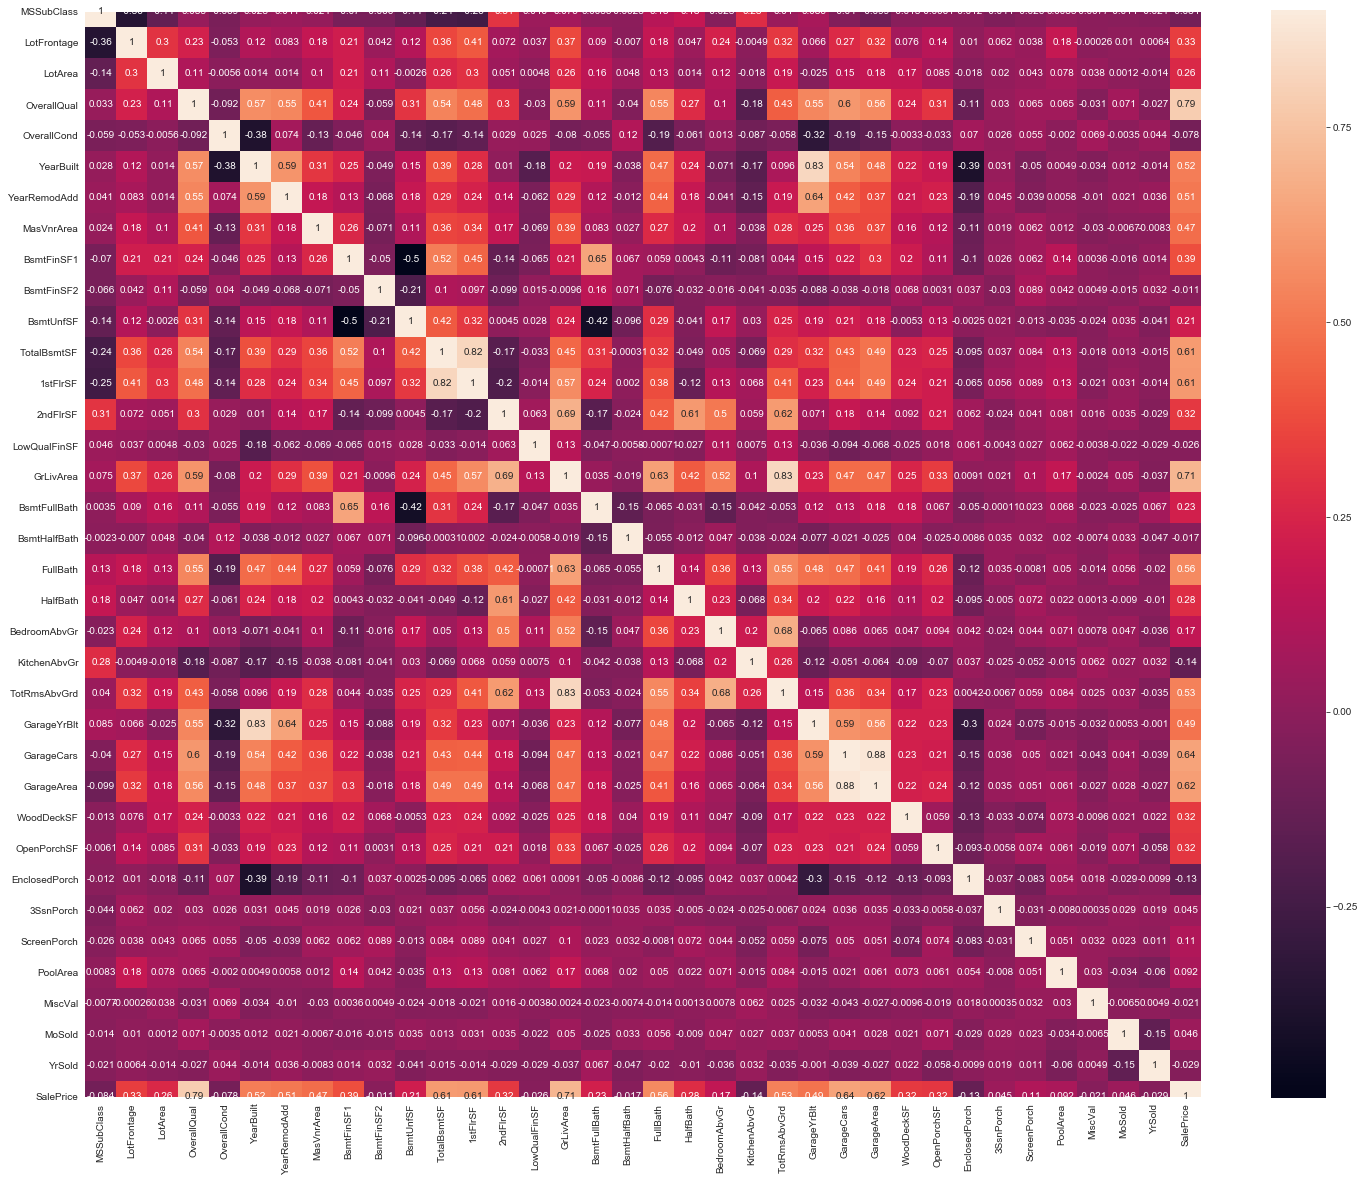

In [15]:
corr = hp.corr()
plt.subplots(figsize=(25,20))
sns.heatmap(corr, vmax=0.9,annot =True, square=True)

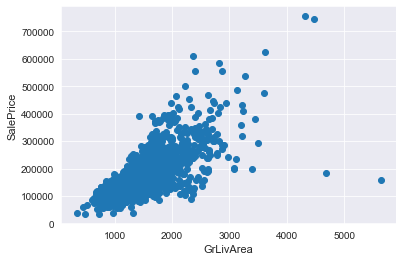

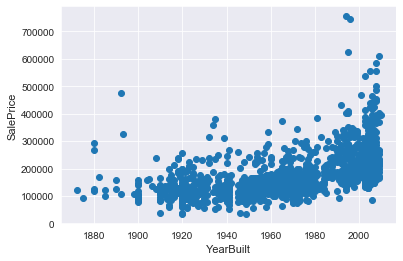

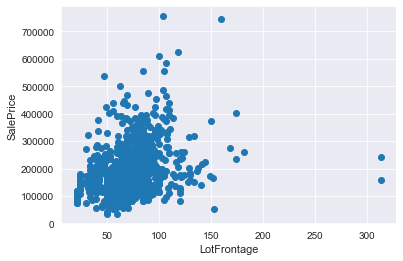

In [16]:
fig, ax = plt.subplots()
ax.scatter(x = hp['GrLivArea'], y = hp['SalePrice'])
plt.ylabel('SalePrice', fontsize=11)
plt.xlabel('GrLivArea', fontsize=11)
plt.show()

fig, ax = plt.subplots()
ax.scatter(x = hp['YearBuilt'], y = hp['SalePrice'])
plt.ylabel('SalePrice', fontsize=11)
plt.xlabel('YearBuilt', fontsize=11)
plt.show()

fig, ax = plt.subplots()
ax.scatter(x = hp['LotFrontage'], y = hp['SalePrice'])
plt.ylabel('SalePrice', fontsize=11)
plt.xlabel('LotFrontage', fontsize=11)
plt.show()



Based on the above generated heatmap,many more variables were dropped and many new variables were created!

In [17]:
hp=hp.drop(columns=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2',
                 'BsmtFinSF2','BsmtUnfSF'])

In [18]:
hp['TotalSf']=hp['1stFlrSF']+hp['2ndFlrSF']+hp['TotalBsmtSF']

In [19]:
hp=hp.drop(columns=['GarageType','GarageYrBlt','GarageFinish','GarageArea','GarageQual','GarageCond','TotRmsAbvGrd','BedroomAbvGr'])

In [20]:
hp=hp.drop(columns=['SaleType','SaleCondition','OverallCond'])


In [21]:
hp=hp.drop(columns=['1stFlrSF','2ndFlrSF','TotalBsmtSF']) 

In [22]:
hp['Bath']=hp['BsmtFullBath']+hp['BsmtHalfBath']+hp['FullBath']+hp['HalfBath'] 
hp['Porch']=hp['OpenPorchSF']+hp['EnclosedPorch']+hp['3SsnPorch']+hp['ScreenPorch']


In [23]:
hp=hp.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','OpenPorchSF','EnclosedPorch',
                    '3SsnPorch','ScreenPorch'])

In [24]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
MSSubClass      1460 non-null int64
MSZoning        1460 non-null object
LotFrontage     1460 non-null float64
LotArea         1460 non-null int64
Street          1460 non-null object
LandContour     1460 non-null object
Utilities       1460 non-null object
LotConfig       1460 non-null object
LandSlope       1460 non-null object
Neighborhood    1460 non-null object
Condition1      1460 non-null object
Condition2      1460 non-null object
BldgType        1460 non-null object
HouseStyle      1460 non-null object
OverallQual     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
RoofStyle       1460 non-null object
RoofMatl        1460 non-null object
Exterior1st     1460 non-null object
Exterior2nd     1460 non-null object
MasVnrType      1460 non-null object
MasVnrArea      1460 non-null float64
ExterQual       1460 non-null object
ExterCon

# Dependent Variable Analysis

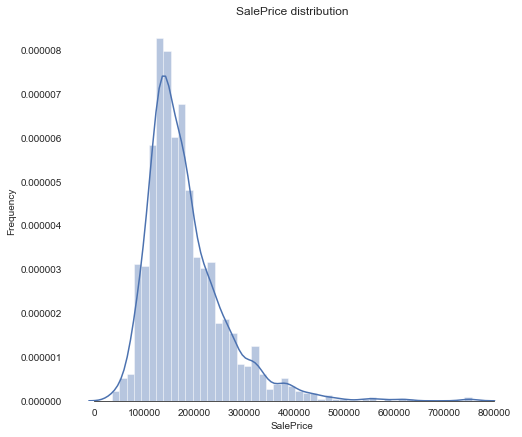

In [25]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7)) 
sns.distplot(hp['SalePrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [26]:
hp["SalePrice"] = np.log1p(hp["SalePrice"])

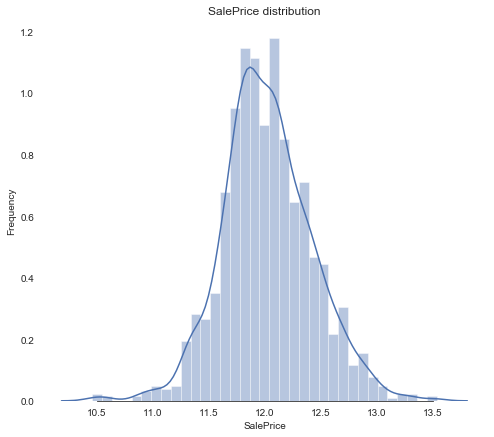

In [27]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(hp['SalePrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [28]:
#Transforming numerical variable that is really categorical
#MSSubClass=The building class
hp['MSSubClass'] = hp['MSSubClass'].apply(str)

In [29]:
hp.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'GarageCars', 'PavedDrive', 'WoodDeckSF', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'TotalSf', 'Bath', 'Porch'],
      dtype='object')

# LABEL ENCODING

In [30]:
from sklearn.preprocessing import LabelEncoder
cols = ('MSSubClass', 'MSZoning','Street','LandContour','Utilities','LotConfig',
        'LandSlope','Neighborhood','Condition1','Condition2','BldgType',
       'HouseStyle','RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd','MasVnrType','ExterQual',
       'ExterCond', 'Foundation','Heating', 'HeatingQC',
       'CentralAir', 'Electrical','KitchenQual', 'Functional','PavedDrive')
#label encoding
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(hp[c].values)) 
    hp[c] = lbl.transform(list(hp[c].values))



In [31]:
def change(x):
    if x!=0:
        x=1
        return x
    else:
        return x
hp['PoolArea']=list(map(lambda x : change(x), hp['PoolArea']))
hp['PoolArea'].unique()

array([0, 1])

In [32]:
hp

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSf,Bath,Porch
0,9,3,65.0,8450,1,3,0,4,0,5,...,2,0,0,0,2,2008,12.247699,2566,4,61
1,4,3,80.0,9600,1,3,0,2,0,24,...,2,298,0,0,5,2007,12.109016,2524,3,0
2,9,3,68.0,11250,1,3,0,4,0,5,...,2,0,0,0,9,2008,12.317171,2706,4,42
3,10,3,60.0,9550,1,3,0,0,0,6,...,2,0,0,0,2,2006,11.849405,2473,2,307
4,9,3,84.0,14260,1,3,0,2,0,15,...,2,192,0,0,12,2008,12.429220,3343,4,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,9,3,62.0,7917,1,3,0,4,0,8,...,2,0,0,0,8,2007,12.072547,2600,3,40
1456,4,3,85.0,13175,1,3,0,4,0,14,...,2,349,0,0,2,2010,12.254868,3615,3,0
1457,10,3,66.0,9042,1,3,0,4,0,6,...,2,0,0,2500,5,2010,12.493133,3492,2,60
1458,4,3,68.0,9717,1,3,0,4,0,12,...,2,366,0,0,4,2010,11.864469,2156,2,112


In [33]:
hp.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'GarageCars', 'PavedDrive', 'WoodDeckSF', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'TotalSf', 'Bath', 'Porch'],
      dtype='object')

In [34]:

X = hp.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street','LandContour', 'Utilities',
                'LotConfig', 'LandSlope', 'Neighborhood','Condition1', 'Condition2', 
                'BldgType', 'HouseStyle', 'OverallQual',
                'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 
                'MasVnrArea', 'ExterQual', 'ExterCond','Foundation', 'Heating', 
                'HeatingQC', 'CentralAir', 'Electrical','LowQualFinSF', 'GrLivArea','KitchenAbvGr', 'KitchenQual', 
                'Functional','GarageCars',  'PavedDrive', 'WoodDeckSF','PoolArea', 'MiscVal',
                'TotalSf','Bath', 'Porch','YearBuilt','YearRemodAdd']]
y = hp.loc[:,['SalePrice']]

In [35]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCars,PavedDrive,WoodDeckSF,PoolArea,MiscVal,TotalSf,Bath,Porch,YearBuilt,YearRemodAdd
0,9,3,65.0,8450,1,3,0,4,0,5,...,2,2,0,0,0,2566,4,61,2003,2003
1,4,3,80.0,9600,1,3,0,2,0,24,...,2,2,298,0,0,2524,3,0,1976,1976
2,9,3,68.0,11250,1,3,0,4,0,5,...,2,2,0,0,0,2706,4,42,2001,2002
3,10,3,60.0,9550,1,3,0,0,0,6,...,3,2,0,0,0,2473,2,307,1915,1970
4,9,3,84.0,14260,1,3,0,2,0,15,...,3,2,192,0,0,3343,4,84,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,9,3,62.0,7917,1,3,0,4,0,8,...,2,2,0,0,0,2600,3,40,1999,2000
1456,4,3,85.0,13175,1,3,0,4,0,14,...,2,2,349,0,0,3615,3,0,1978,1988
1457,10,3,66.0,9042,1,3,0,4,0,6,...,1,2,0,0,2500,3492,2,60,1941,2006
1458,4,3,68.0,9717,1,3,0,4,0,12,...,1,2,366,0,0,2156,2,112,1950,1996


In [36]:
y

,SalePrice
0,12.247699
1,12.109016
2,12.317171
3,11.849405
4,12.429220
...,...
1455,12.072547
1456,12.254868
1457,12.493133
1458,11.864469


SCALING:
MinMaxScaler is used for scaling as the data is not normally distributed and doesn't have much outliers!


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org) 

## TWO MODELS WITH BAGGING

In [53]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge, Lasso
lr_clf = Lasso(alpha=0.001)
bag_clf = BaggingRegressor(lr_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
from  sklearn.metrics import r2_score
print('R2 score" {:.2f}'.format(r2_score(y_test, y_pred)))
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

R2 score" 0.79
Train score: 0.87
Test score: 0.79


In [51]:
ridge_clf = Ridge(alpha=0.1)
bag_clf = BaggingRegressor(ridge_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
from  sklearn.metrics import r2_score
print('R2 score" {:.2f}'.format(r2_score(y_test, y_pred)))
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

R2 score" 0.78
Train score: 0.87
Test score: 0.78


## TWO MODELS WITH PASTING

In [54]:
lr_clf = Lasso(alpha=0.001)
bag_clf = BaggingRegressor(lr_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
from  sklearn.metrics import r2_score
print('R2 score" {:.2f}'.format(r2_score(y_test, y_pred)))
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

R2 score" 0.79
Train score: 0.87
Test score: 0.79


In [55]:
ridge_clf = Ridge(alpha=0.1)
bag_clf = BaggingRegressor(ridge_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
from  sklearn.metrics import r2_score
print('R2 score" {:.2f}'.format(r2_score(y_test, y_pred)))
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

R2 score" 0.78
Train score: 0.87
Test score: 0.78


## TWO MODELS WITH ADABOOST REGRESSOR

In [56]:
from sklearn.ensemble import AdaBoostRegressor
ada_clf = AdaBoostRegressor(base_estimator=Lasso(alpha=0.001), n_estimators=200, learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.86
Test score: 0.70


In [57]:
from sklearn.ensemble import AdaBoostRegressor
ada_clf = AdaBoostRegressor(base_estimator=Ridge(alpha=0.1), n_estimators=200, learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.86
Test score: 0.67


## ONE MODEL WITH GRADIENT BOOSTING

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(random_state=0, learning_rate=0.1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.952
Accuracy on test set: 0.886


## DEEP LEARNING (NEURAL NETWORK)

In [70]:
from keras.models import Sequential
from keras.layers import Dense
# create model
model = Sequential()
model.add(Dense(43, input_dim=43, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])
#Fit the model
model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split=0.15)
#Evaluate model
model.evaluate(X_test, y_test)
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))


Train on 930 samples, validate on 165 samples
Epoch 1/100
930/930 [==============================] - 0s 363us/step - loss: 9.1329 - mse: 9.1329 - val_loss: 0.7292 - val_mse: 0.7292
Epoch 2/100
930/930 [==============================] - 0s 75us/step - loss: 0.4916 - mse: 0.4916 - val_loss: 0.4380 - val_mse: 0.4380
Epoch 3/100
930/930 [==============================] - 0s 83us/step - loss: 0.4050 - mse: 0.4050 - val_loss: 0.3510 - val_mse: 0.3510
Epoch 4/100
930/930 [==============================] - 0s 78us/step - loss: 0.4148 - mse: 0.4148 - val_loss: 0.3028 - val_mse: 0.3028
Epoch 5/100
930/930 [==============================] - 0s 79us/step - loss: 0.3153 - mse: 0.3153 - val_loss: 0.2679 - val_mse: 0.2679
Epoch 6/100
930/930 [==============================] - 0s 89us/step - loss: 0.3403 - mse: 0.3403 - val_loss: 0.2499 - val_mse: 0.2499
Epoch 7/100
930/930 [==============================] - 0s 81us/step - loss: 0.3683 - mse: 0.3683 - val_loss: 0.2300 - val_mse: 0.2300
Epoch 8/100
93

Epoch 60/100
930/930 [==============================] - 0s 71us/step - loss: 0.0717 - mse: 0.0717 - val_loss: 0.1340 - val_mse: 0.1340
Epoch 61/100
930/930 [==============================] - 0s 73us/step - loss: 0.1059 - mse: 0.1059 - val_loss: 0.1208 - val_mse: 0.1208
Epoch 62/100
930/930 [==============================] - 0s 72us/step - loss: 0.0732 - mse: 0.0732 - val_loss: 0.0678 - val_mse: 0.0678
Epoch 63/100
930/930 [==============================] - 0s 71us/step - loss: 0.0620 - mse: 0.0620 - val_loss: 0.0675 - val_mse: 0.0675
Epoch 64/100
930/930 [==============================] - 0s 72us/step - loss: 0.0749 - mse: 0.0749 - val_loss: 0.1983 - val_mse: 0.1983
Epoch 65/100
930/930 [==============================] - 0s 73us/step - loss: 0.0698 - mse: 0.0698 - val_loss: 0.2034 - val_mse: 0.2034
Epoch 66/100
930/930 [==============================] - 0s 72us/step - loss: 0.0835 - mse: 0.0835 - val_loss: 0.0547 - val_mse: 0.0547
Epoch 67/100
930/930 [==============================] -

## PCA

In [133]:
from sklearn.decomposition import PCA

In [199]:
pca=PCA(n_components=25)
X_Train=pca.fit_transform(X_train)
X_Test=pca.transform(X_test)

# KNN

Text(0, 0.5, 'MSE')

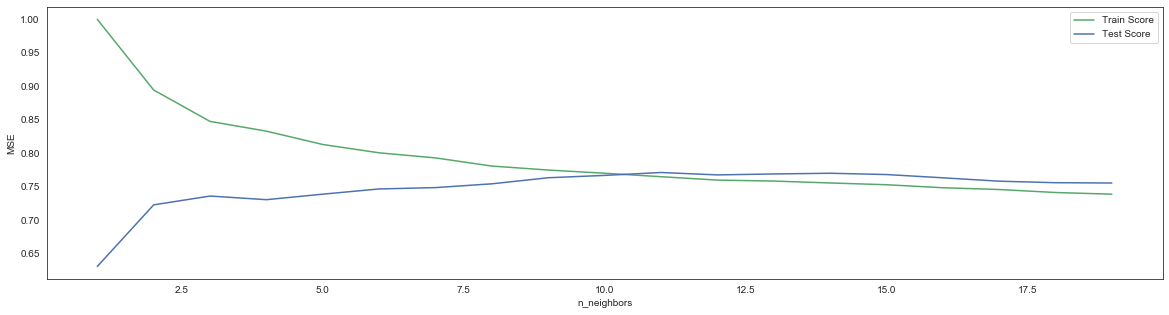

In [200]:
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_Train, y_train)
    train_score_array.append(knn_reg.score(X_Train, y_train))
    test_score_array.append(knn_reg.score(X_Test, y_test))

x_axis = range(1,20)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('MSE')




In [201]:
print(train_score_array)
print(test_score_array)

[0.9999823755946341, 0.894364969396583, 0.8474359461369174, 0.8328652121519627, 0.8129135085686309, 0.8004818259859884, 0.7928781789697181, 0.7806620111203274, 0.7747331320385957, 0.7699442849409267, 0.7647782129867858, 0.7596886298325108, 0.7582443395651913, 0.755406651335097, 0.7527651204814605, 0.7482597248817772, 0.7456356818016184, 0.7411527360440353, 0.7386398547878579]
[0.6306191040296287, 0.7226792135789168, 0.7358465605172176, 0.7304184088869117, 0.7386711222959295, 0.7464730270104869, 0.7484897526076535, 0.7541246771475181, 0.76320744616556, 0.7667215729812104, 0.7710399849195959, 0.7674602824369443, 0.7688769590758298, 0.7699295431128138, 0.7679998460271733, 0.7631391902397934, 0.7580713586515561, 0.755800181570077, 0.7553428126022268]


In [222]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}]

model_knn = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=3, n_jobs=-1,return_train_score=True)
model_knn.fit(X_Train, y_train)


print('KNN: Best Parameters',model_knn.best_params_)


y_pred_knn = model_knn.predict(X_Test)
print(model_knn.score(X_Test,y_test))

KNN: Best Parameters {'n_neighbors': 9}
0.76320744616556


In [223]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_Train,y_train)
print('Cross-validation scores:',cross_val_score(knn,X_Train,y_train) )
print('Cross-validation scores:',cross_val_score(knn,X_Test,y_test) )
print('Average Train score:',cross_val_score(knn,X_Train,y_train).mean())
print('Average Test score:',cross_val_score(knn,X_Test,y_test).mean())

Cross-validation scores: [0.68974393 0.71677582 0.6948013 ]
Cross-validation scores: [0.66359889 0.67509243 0.71048841]
Average Train score: 0.7004403494012807
Average Test score: 0.6830599093107305


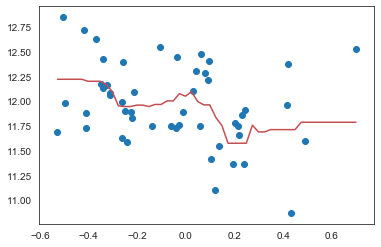

In [224]:
X_b = X_Train[:50,3].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(10)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)

# LINEAR REGRESSION 

In [225]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_Train, y_train)
print(lreg.score(X_Train, y_train))
print(lreg.score(X_Test, y_test))

0.8559661116881527
0.7946380807320416


In [226]:
from sklearn.model_selection import cross_val_score
print('Cross-validation scores:',cross_val_score(lreg,X_Train,y_train) )
print('Cross-validation scores:',cross_val_score(lreg,X_Test,y_test) )
print('Average Train score:',cross_val_score(lreg,X_Train,y_train).mean())
print('Average Test score:',cross_val_score(lreg,X_Test,y_test).mean())

Cross-validation scores: [0.80491063 0.86153348 0.86420717]
Cross-validation scores: [0.83096138 0.80117696 0.69216798]
Average Train score: 0.8435504257454342
Average Test score: 0.7747687730359963


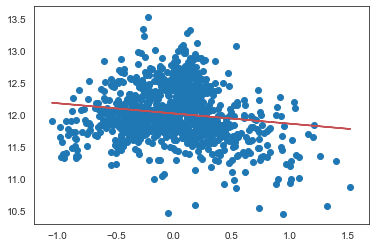

In [227]:
import matplotlib.pyplot as plt

X_train_rm = X_Train[:,2].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)


# RIDGE 

In [228]:
from sklearn.linear_model import Ridge
x_range = [0.00001, 0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_Train,y_train)
    train_score_list.append(ridge.score(X_Train,y_train))
    test_score_list.append(ridge.score(X_Test, y_test))

In [229]:
print(train_score_list)
print(test_score_list)

[0.8559661116881359, 0.8559661115180147, 0.8559660946871106, 0.8559644242423788, 0.8558091003534842, 0.8468840533500106, 0.7268710881796582]
[0.7946381126812011, 0.7946412753691161, 0.7946700017653953, 0.7949547737808307, 0.7975686474485703, 0.8094353806163792, 0.7404999948632155]


In [230]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}]

print("# Tuning hyper-parameters")
print()

model_ridge = GridSearchCV(Ridge(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_ridge.fit(X_Train, y_train)


print('Ridge: Best Parameters',model_ridge.best_params_)


y_pred_ridge = model_ridge.predict(X_Test)
print(model_ridge.score(X_Test,y_test))

# Tuning hyper-parameters

Ridge: Best Parameters {'alpha': 1}
0.7975686474485703


In [231]:
ridge = Ridge(alpha=1)
ridge.fit(X_Train,y_train)
print('Cross-validation scores:',cross_val_score(ridge,X_Train,y_train) )
print('Cross-validation scores:',cross_val_score(ridge,X_Test,y_test) )
print('Average Train score:',cross_val_score(ridge,X_Train,y_train).mean())
print('Average Test score:',cross_val_score(ridge,X_Test,y_test).mean())


Cross-validation scores: [0.80571728 0.8613962  0.86385054]
Cross-validation scores: [0.8290759  0.8073509  0.71356976]
Average Train score: 0.8436546718685817
Average Test score: 0.7833321869920025


Text(0.5, 1.0, 'Ridge')

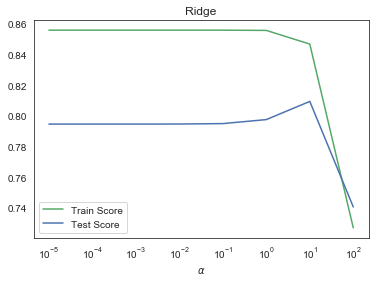

In [232]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.title('Ridge')

In [233]:
ridge.coef_

array([[-0.49232875,  0.16244305, -0.15836692, -0.2601623 ,  0.13652372,
        -0.21952326, -0.2508314 , -0.1640874 ,  0.15218453,  0.10891733,
        -0.217202  ,  0.16623686,  0.0521187 ,  0.08317355,  0.38479859,
        -0.26802002, -0.18283497,  0.1080184 , -0.11149449,  0.4047208 ,
        -0.01792731, -0.11324006, -0.14779758, -0.10100932,  0.23495963]])

In [234]:
ridge.intercept_

array([12.02225857])

# POLYNOMIAL REGRESSION 

In [239]:
from  sklearn.preprocessing  import PolynomialFeatures
train_score=[]
test_score=[]
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_Train)
X_test_poly = poly.transform(X_Test)
lreg.fit(X_train_poly, y_train)
train_score.append(lreg.score(X_train_poly, y_train))
test_score.append(lreg.score(X_test_poly, y_test))
                                                

In [240]:
print(train_score)
print(test_score)

[0.938228634316123]
[0.791644850627066]


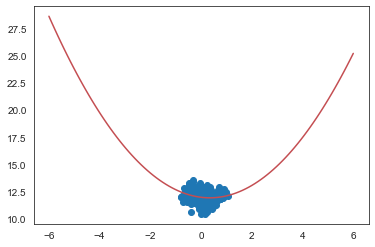

In [248]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_Train[:,3].reshape(-1,1))
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(-6,6,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_Train_1 = X_Train[:,3].reshape(-1,1)
plt.scatter(X_Train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r',label='Truth')

# LASSO 

In [250]:
from sklearn.linear_model import Lasso
x_range = [0.00001, 0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_Train,y_train)
    train_score_list.append(lasso.score(X_Train,y_train))
    test_score_list.append(lasso.score(X_Test, y_test))

In [251]:
print(train_score_list)
print(test_score_list)

[0.8559656374519735, 0.8515056736175657, 0.7001704579335863, 0.3876915917756187, 0.0, 0.0, 0.0]
[0.7948099524480308, 0.8065240892544198, 0.7163211215499696, 0.416163424649404, -0.0003481253639345816, -0.0003481253639345816, -0.0003481253639345816]


In [252]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}]

print("# Tuning hyper-parameters")
print()

model_lasso = GridSearchCV(Lasso(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_lasso.fit(X_Train, y_train)


print('Lasso: Best Parameters',model_lasso.best_params_)


y_pred_lasso = model_lasso.predict(X_Test)
print(model_lasso.score(X_Test,y_test))

# Tuning hyper-parameters

Lasso: Best Parameters {'alpha': 0.0001}
0.7963056867555685


In [253]:
from sklearn.model_selection import cross_val_score
lasso = Lasso(alpha=0.0001)
lasso.fit(X_Train,y_train)
print('Cross-validation scores:',cross_val_score(lasso,X_Train,y_train) )
print('Cross-validation scores:',cross_val_score(lasso,X_Test,y_test) )
print('Average Train score:',cross_val_score(lasso,X_Train,y_train).mean())
print('Average Test score:',cross_val_score(lasso,X_Test,y_test).mean())

Cross-validation scores: [0.80542648 0.86112327 0.86401347]
Cross-validation scores: [0.83162469 0.80252237 0.6966558 ]
Average Train score: 0.843521070290076
Average Test score: 0.7769342880490623


Text(0.5, 1.0, 'Lasso')

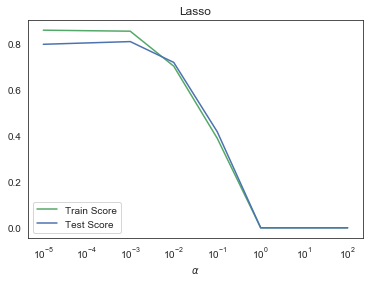

In [254]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.title('Lasso')

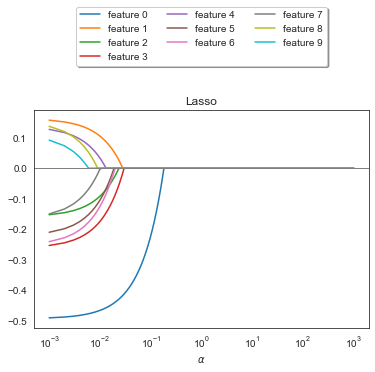

In [255]:
x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_Train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,10):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.title('Lasso')
plt.show()

# DECISION TREE REGRESSOR

In [256]:
from sklearn.tree import DecisionTreeRegressor
tuned_parameters = [{'max_depth':[1,2,3,4,5,6,7,8,9,10]}]

print("# Tuning hyper-parameters")
print()

model_tree = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_tree.fit(X_Train, y_train)


print('SVM: Best Parameters',model_tree.best_params_)


y_pred_svr = model_tree.predict(X_Test)
print(model_tree.score(X_Test,y_test))

# Tuning hyper-parameters

SVM: Best Parameters {'max_depth': 4}
0.6572696148366621


In [257]:
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X_Train, y_train)
print('Cross-validation scores:',cross_val_score(tree,X_Train, y_train) )
print('Cross-validation scores:',cross_val_score(tree,X_Test, y_test) )
print('Average Train score:',cross_val_score(tree,X_Train, y_train).mean())
print('Average Test score:',cross_val_score(tree,X_Test, y_test).mean())

Cross-validation scores: [0.54535491 0.54158706 0.57126217]
Cross-validation scores: [0.69459928 0.54222398 0.5225295 ]
Average Train score: 0.5602892555836118
Average Test score: 0.5852488964822105


Text(0.5, 0, 'LotArea')

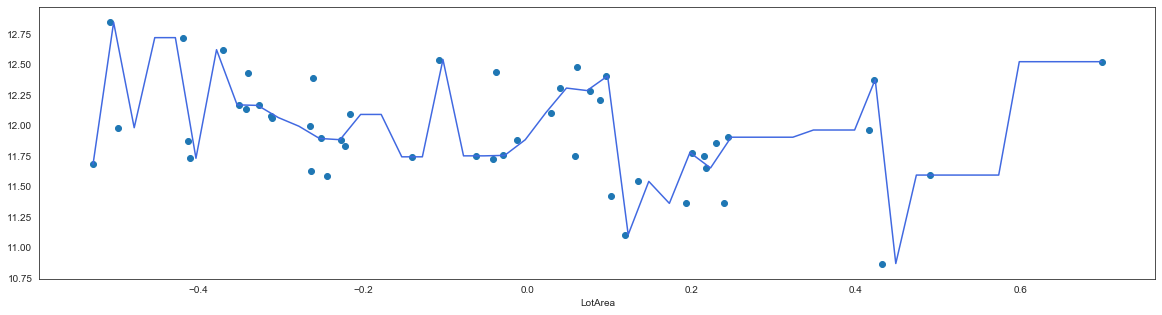

In [258]:
X_b = X_Train[:50,3].reshape(-1,1)
y_b = y_train[:50]

tree = DecisionTreeRegressor()
tree.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = tree.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'royalblue')
plt.scatter(X_b, y_b)
plt.xlabel('LotArea')

# SVR Linear

[-732.4785454159097, -8.11537542897294, 0.8515483661055298, 0.8510667750348779, 0.850682081867916, 0.8324430507279497, 0.6165705763899435, 0.22791764991834437]
[-803.9532623559695, -8.940356323176669, 0.8004466338982041, 0.7955714316897906, 0.7958692394598321, 0.7753711566207757, 0.5051143689558579, 0.05771568858111242]


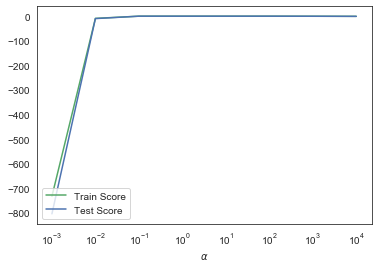

In [259]:
from sklearn.svm import LinearSVR

train_score_list = []
test_score_list = []
C= [0.001,0.01,0.1,1,10,100,1000,10000]

c_value={}
for i in C: 
    clf = LinearSVR(C=i, max_iter= 3000)
    clf.fit(X_Train,y_train)
    train_score_list.append(clf.score(X_Train,y_train))
    test_score_list.append(clf.score(X_Test, y_test))
    c_value[i]=clf.score(X_Test, y_test)


import matplotlib.pyplot as plt
plt.plot(C, train_score_list, c = 'g', label = 'Train Score')
plt.plot(C, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
print(train_score_list)
print(test_score_list)

In [260]:

tuned_parameters = [{'C': [0.001,0.01, 0.1, 1, 10, 100,1000]}]

print("# Tuning hyper-parameters")
print()

model_linsvr = GridSearchCV(LinearSVR(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_linsvr.fit(X_Train, y_train)


print('SVM: Best Parameters',model_linsvr.best_params_)


y_pred_linsvr = model_linsvr.predict(X_Test)
print(model_linsvr.score(X_Test,y_test))

# Tuning hyper-parameters

SVM: Best Parameters {'C': 1}
0.795578399923478


In [261]:
svr = LinearSVR(C=1)
svr.fit(X_Train, y_train)
print('Cross-validation scores:',model_linsvr.score(X_Train, y_train) )
print('Cross-validation scores:',model_linsvr.score(X_Test, y_test) )
print('Average Train score:',model_linsvr.score(X_Train, y_train).mean())
print('Average Test score:',model_linsvr.score(X_Test, y_test).mean())

Cross-validation scores: 0.8509378039985155
Cross-validation scores: 0.795578399923478
Average Train score: 0.8509378039985155
Average Test score: 0.795578399923478


# SVR KERNEL

In [262]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.01, 0.1, 1, 10, 100],
                     'C': [0.01, 0.1, 1, 10, 100]},
                    {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]},
                    {'kernel': ['poly'], 'degree': [1,2,3,4,5],
                     'C': [0.01, 0.1, 1, 10, 100]}]

print("# Tuning hyper-parameters")
print()

model = GridSearchCV(SVR(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model.fit(X_Train, y_train)


print('SVM: Best Parameters',model.best_params_)


y_pred_svr = model.predict(X_Test)
print(model.score(X_Test,y_test))

# Tuning hyper-parameters

SVM: Best Parameters {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.8383269888134247


In [263]:
svrrbf = SVR(kernel='rbf',gamma=0.1,C=1)
svrrbf.fit(X_train, y_train)
print('Cross-validation scores:',cross_val_score(svrrbf,X_Train, y_train) )
print('Cross-validation scores:',cross_val_score(svrrbf,X_Test, y_test) )
print('Average Train score:',cross_val_score(svrrbf,X_Train, y_train).mean())
print('Average Test score:',cross_val_score(svrrbf,X_Test, y_test).mean())

Cross-validation scores: [0.81719888 0.86625415 0.86859784]
Cross-validation scores: [0.85621455 0.81357608 0.77783878]
Average Train score: 0.850683623359262
Average Test score: 0.8158764682744252


## SUMMARY PRE PCA

In [264]:
Summary={'Algorithm':['Linear Regression','KNN Regressor','SVM', 'Linear SVM', 'Decision Tree Regressor','Ridge',
                      'Lasso','Polynomial'], 'Best Accuracy':[0.57,0.67,0.74,0.68,0.59,0.76,0.75,-0.47], 
         'Parameters':['n/a','K=10',['kernel:rbf','gamma=0.01','C=100'],'C=10','max_depth=7','alpha=1','alpha=0.001',
                       'polynomial=2']}
Summary_table=pd.DataFrame(Summary, columns=['Algorithm','Best Accuracy','Parameters'])

In [265]:
Summary_table

,Algorithm,Best Accuracy,Parameters
0,Linear Regression,0.57,n/a
1,KNN Regressor,0.67,K=10
2,SVM,0.74,"[kernel:rbf, gamma=0.01, C=100]"
3,Linear SVM,0.68,C=10
4,Decision Tree Regressor,0.59,max_depth=7
5,Ridge,0.76,alpha=1
6,Lasso,0.75,alpha=0.001
7,Polynomial,-0.47,polynomial=2


## SUMMARY POST PCA

In [266]:
Summary={'Algorithm':['Linear Regression','KNN Regressor','SVM', 'Linear SVM', 'Decision Tree Regressor','Ridge',
                      'Lasso','Polynomial'], 'Best Accuracy':[0.77,0.68,0.81,0.79,0.58,0.78,0.79,0.79], 
         'Parameters':['n/a','K=9',['kernel:rbf','gamma=0.1','C=1'],'C=1','max_depth=4','alpha=1','alpha=0.0001',
                       'polynomial=2']}
Summary_table=pd.DataFrame(Summary, columns=['Algorithm','Best Accuracy','Parameters'])

In [267]:
Summary_table

,Algorithm,Best Accuracy,Parameters
0,Linear Regression,0.77,n/a
1,KNN Regressor,0.68,K=9
2,SVM,0.81,"[kernel:rbf, gamma=0.1, C=1]"
3,Linear SVM,0.79,C=1
4,Decision Tree Regressor,0.58,max_depth=4
5,Ridge,0.78,alpha=1
6,Lasso,0.79,alpha=0.0001
7,Polynomial,0.79,polynomial=2


# Thus, running these models using PCA improved accuracy.


In [270]:
# BEST MODEL as per accuracy: SVM WITH KERNEL
print('Average Test score:',cross_val_score(svrrbf,X_Test, y_test).mean())

Average Test score: 0.8158764682744252


In [271]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred_svr))
rms

0.1550602428104855